In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib. pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
def seleccionarAtributos(columnas):
    atributos=[]
    for i in columnas:
        if data[i].dtype == "object":
            print("{} no es numero".format(i))
            
        else: 
            print("{}  es numero{}".format(i,data[i].dtype))
            atributos.append(i)
    return atributos

In [3]:
data=pd.read_csv("wine.csv")
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                        178 non-null int64
Alcohol                      178 non-null float64
MalicAcid                    178 non-null float64
Ash                          178 non-null float64
AlcalinityOfAsh              178 non-null float64
Magnesium                    178 non-null int64
TotalPhenols                 178 non-null float64
Flavanoids                   178 non-null float64
NonflavanoidPhenols          178 non-null float64
Proanthocyanins              178 non-null float64
ColorIntensity               178 non-null float64
Hue                          178 non-null float64
OD280/OD315OfDilutedWines    178 non-null float64
Proline                      178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 20.9 KB


In [4]:
data.corr()

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315OfDilutedWines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
MalicAcid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
AlcalinityOfAsh,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
TotalPhenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
NonflavanoidPhenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [5]:
#scatter_matrix(data[seleccionarAtributos(data.columns)],figsize=(12,8))

### Diccionario de datos


In [6]:
 def estandarizar(columns):
    scaler = MinMaxScaler()
    dfEstandarizado=pd.DataFrame(np.arange(data.shape[0]))
    for i in columns:
        aux=scaler.fit_transform(np.array(data[i]).reshape(-1,1))
        dfEstandarizado["{}_std".format(i)]=aux
    return dfEstandarizado

In [7]:
dfEstandarizado=estandarizar(seleccionarAtributos(data.columns)).iloc[:,2:]
dfEstandarizado.head()

Class  es numeroint64
Alcohol  es numerofloat64
MalicAcid  es numerofloat64
Ash  es numerofloat64
AlcalinityOfAsh  es numerofloat64
Magnesium  es numeroint64
TotalPhenols  es numerofloat64
Flavanoids  es numerofloat64
NonflavanoidPhenols  es numerofloat64
Proanthocyanins  es numerofloat64
ColorIntensity  es numerofloat64
Hue  es numerofloat64
OD280/OD315OfDilutedWines  es numerofloat64
Proline  es numeroint64


,Alcohol_std,MalicAcid_std,Ash_std,AlcalinityOfAsh_std,Magnesium_std,TotalPhenols_std,Flavanoids_std,NonflavanoidPhenols_std,Proanthocyanins_std,ColorIntensity_std,Hue_std,OD280/OD315OfDilutedWines_std,Proline_std
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [8]:
pca=PCA(n_components=4)
pc=pca.fit_transform(dfEstandarizado)
pcaDesc=pd.DataFrame({"var":pca.explained_variance_ratio_,"PC":["PC1","PC2","PC3","PC4"]})
dfPCA=pd.DataFrame(data=pc,columns=["PC1","PC2","PC3","PC4"])
pcaDesc.head()


,var,PC
0,0.407495,PC1
1,0.189704,PC2
2,0.085617,PC3
3,0.074267,PC4


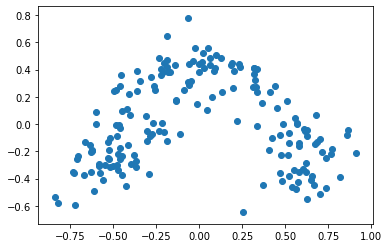

In [9]:
plt.scatter(dfPCA["PC1"],dfPCA["PC2"])

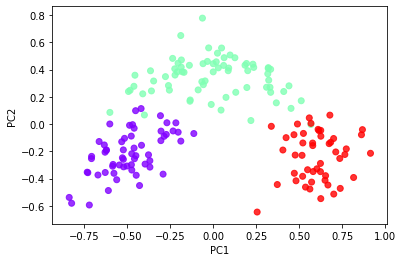

In [10]:
plt.scatter(dfPCA["PC1"],
            dfPCA["PC2"],
            c=data["Class"],
            cmap="rainbow",
           alpha=0.8)
#graficarCentroides(kmeans.cluster_centers_)
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()

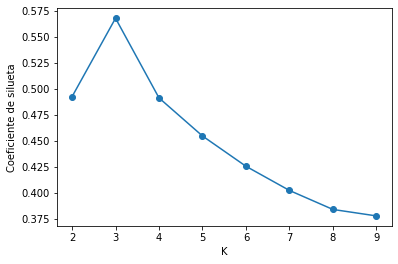

In [11]:
X=np.array(dfPCA[["PC1","PC2"]])
predictions=pd.DataFrame()
metricEv=[]
ks=range(2,10)
for i in ks:
    kmeanEv = KMeans(n_clusters=i).fit(X)
    labels = kmeanEv.labels_
    metricEv.append(metrics.silhouette_score(X, labels, metric='euclidean'))
plt.plot(ks,metricEv,"o-")
plt.ylabel("Coeficiente de silueta")
plt.xlabel("K")
plt.show()

## KMeans

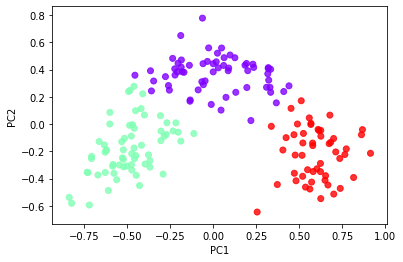

In [12]:
kmeans = KMeans(n_clusters=3).fit(X)
data["KMEANSprediction"]=kmeans.fit_predict(X)
plt.scatter(dfPCA["PC1"],
            dfPCA["PC2"],
            c=data["KMEANSprediction"],
            cmap="rainbow",
           alpha=0.8)
#graficarCentroides(kmeans.cluster_centers_)
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()

## Aglomerativo MST Average Link

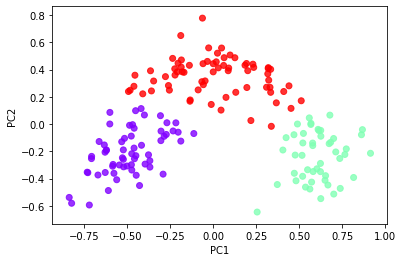

In [13]:
agglo = AgglomerativeClustering(n_clusters=3, linkage = "average").fit(X)
data["AggloPrediction"]=agglo.fit_predict(X)
plt.scatter(dfPCA["PC1"],
            dfPCA["PC2"],
            c=data["AggloPrediction"],
            cmap="rainbow",
           alpha=0.8)
#graficarCentroides(kmeans.cluster_centers_)
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()


## DBSCAN

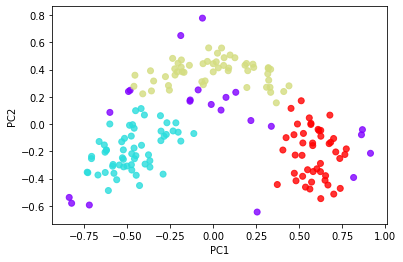

In [14]:
dbscan = DBSCAN(eps=0.14, min_samples=10).fit(X)
data["DBSCANPrediction"]=dbscan.fit_predict(X)
plt.scatter(dfPCA["PC1"],
            dfPCA["PC2"],
            c=data["DBSCANPrediction"],
            cmap="rainbow",
           alpha=0.8)
#graficarCentroides(kmeans.cluster_centers_)
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()

## BIRCH

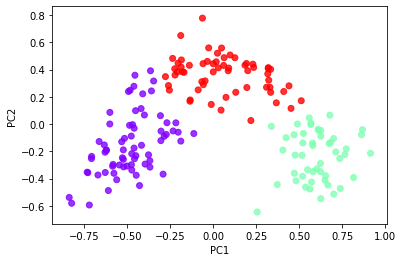

In [15]:
birch = Birch(branching_factor=30, n_clusters=3, threshold=0.17).fit(X)
data["BIRCHPrediction"]=birch.fit_predict(X)
plt.scatter(dfPCA["PC1"],
            dfPCA["PC2"],
            c=data["BIRCHPrediction"],
            cmap="rainbow",
           alpha=0.8)
#graficarCentroides(kmeans.cluster_centers_)
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()